In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim
from pathlib import Path
import numpy as np
from skimage.transform import resize
from tqdm import tqdm

def load_subdirs(dataset_path):
    dataset_path = Path(dataset_path)
    subdirs = [subdir for subdir in dataset_path.iterdir() if subdir.is_dir()]
    subdir_names = [subdir.name for subdir in subdirs]
    return subdir_names, subdirs


dataset1_path = '/home/workstation/code/XAImethods/CAIN/evaluation_results/imagenet/val_images10k_attack/defocus_blur/1_vit/google/vit-large-patch32-384/GradCAM'
dataset2_path = '/home/workstation/code/XAImethods/CAIN/evaluation_results/imagenet/val_images10k_vit/google/vit-large-patch32-384/GradCAM'

subdir_names1, subdirs1 = load_subdirs(dataset1_path)
subdir_names2, subdirs2 = load_subdirs(dataset2_path)

common_subdir_names = set(subdir_names1).intersection(subdir_names2)
common_subdirs1 = [subdirs1[subdir_names1.index(subdir_name)] for subdir_name in common_subdir_names]
common_subdirs2 = [subdirs2[subdir_names2.index(subdir_name)] for subdir_name in common_subdir_names]
print(len(common_subdir_names))

def compute_ssim_for_masked_image(subdir1, subdir2):
    masked_image1_path = subdir1 / "masked_image.jpg"
    masked_image2_path = subdir2 / "masked_image.jpg"
    
    try:
        masked_image1 = img_as_float(io.imread(masked_image1_path, as_gray=True))
        masked_image2 = img_as_float(io.imread(masked_image2_path, as_gray=True))
        
        ssim_value = ssim(masked_image1, masked_image2, data_range=1.0)  
        return ssim_value
    except Exception as e:
        print(f"Error processing {subdir1.name}. Error: {e}")
        return None

def compute_ssim_for_original(subdir1, subdir2):
    original1_path = subdir1 / "original.jpg"
    original2_path = subdir2 / "original.jpg"
    
    try:
        original1 = img_as_float(io.imread(original1_path, as_gray=True))
        original2 = img_as_float(io.imread(original2_path, as_gray=True))
        

        if original1.shape != original2.shape:
            original1 = resize(original1, original2.shape, mode='reflect')
        
        ssim_value = ssim(original1, original2, data_range=1.0)
        return ssim_value
    except Exception as e:
        print(f"Error processing {subdir1.name}. Error: {e}")
        return None

ssim_orig_values = [compute_ssim_for_original(subdir1, subdir2) for subdir1, subdir2 in tqdm(zip(common_subdirs1, common_subdirs2), total=len(common_subdirs1), desc="Processing original images SSIM")]
ssim_orig_values = [val for val in ssim_orig_values if val is not None]

ssim_masked_values = [compute_ssim_for_masked_image(subdir1, subdir2) for subdir1, subdir2 in tqdm(zip(common_subdirs1, common_subdirs2), total=len(common_subdirs1), desc="Processing masked images SSIM")]
ssim_masked_values = [val for val in ssim_masked_values if val is not None]


mean_ssim_orig = np.mean(ssim_orig_values)
mean_ssim_masked = np.mean(ssim_masked_values)

median_ssim_orig = np.median(ssim_orig_values)
median_ssim_masked = np.median(ssim_masked_values)

print(f"Average SSIM for original images: {mean_ssim_orig:.4f}")
print(f"Average SSIM for masked images: {mean_ssim_masked:.4f}")
print(f"Median SSIM for original images: {median_ssim_orig:.4f}")
print(f"Median SSIM for masked images: {median_ssim_masked:.4f}")



6091


Processing masked images SSIM:   0%|          | 17/6091 [00:00<00:37, 162.99it/s]

Error processing ILSVRC2012_val_00034746_n03874293. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002842_n03447721. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007017_n04557648. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025662_n02117135. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048333_n02086079. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007878_n02328150. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035272_n07720875. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032511_n03404251. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001245_n04579432. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007392_n02094114. Error: Input images m

Processing masked images SSIM:   1%|          | 52/6091 [00:00<00:37, 163.18it/s]

Error processing ILSVRC2012_val_00002046_n04044716. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003462_n03041632. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037748_n01530575. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007479_n01944390. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047150_n02102973. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018954_n03452741. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025806_n01582220. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032192_n03496892. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045751_n03461385. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021701_n02422699. Error: Input images m

Processing masked images SSIM:   1%|          | 70/6091 [00:00<00:35, 167.84it/s]

Error processing ILSVRC2012_val_00023551_n01514668. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023406_n02607072. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005416_n01675722. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000198_n01560419. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029494_n04311004. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018917_n03017168. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008676_n02129604. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045064_n04328186. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020747_n01795545. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022786_n01824575. Error: Input images m

Processing masked images SSIM:   2%|▏         | 100/6091 [00:00<01:09, 85.92it/s]

Error processing ILSVRC2012_val_00011278_n01629819. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005402_n04266014. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023767_n03884397. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017722_n02110063. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034364_n03000134. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013933_n03110669. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014538_n02125311. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039685_n02346627. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019225_n02727426. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028747_n07583066. Error: Input images m

Processing masked images SSIM:   2%|▏         | 139/6091 [00:01<00:47, 126.62it/s]

Error processing ILSVRC2012_val_00035916_n01796340. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048732_n01537544. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007439_n04399382. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012315_n02280649. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044600_n02114855. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039475_n01698640. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010636_n03791053. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015760_n03532672. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015831_n01694178. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031942_n02483708. Error: Input images m

Processing masked images SSIM:   3%|▎         | 177/6091 [00:01<00:38, 151.89it/s]

Error processing ILSVRC2012_val_00033297_n03180011. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009681_n02704792. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010789_n03124043. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037274_n11879895. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003213_n02447366. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031459_n02860847. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048515_n02107683. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041118_n02098105. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020435_n03467068. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015349_n02099429. Error: Input images m

Processing masked images SSIM:   3%|▎         | 213/6091 [00:01<00:36, 160.15it/s]

Error processing ILSVRC2012_val_00043216_n02108551. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031311_n01753488. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045496_n04127249. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008130_n01735189. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007611_n04252225. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040804_n07753275. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004852_n02113624. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021299_n01632458. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022411_n02129604. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049959_n02099712. Error: Input images m

Processing masked images SSIM:   4%|▍         | 250/6091 [00:01<00:35, 166.00it/s]

Error processing ILSVRC2012_val_00030085_n06359193. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048154_n04149813. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037601_n04209133. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038934_n03444034. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006829_n03457902. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004871_n02708093. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032506_n03089624. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013292_n03379051. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010267_n03787032. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019748_n04204347. Error: Input images m

Processing masked images SSIM:   5%|▍         | 291/6091 [00:02<00:31, 181.82it/s]

Error processing ILSVRC2012_val_00017449_n07717556. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039938_n04507155. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043722_n02655020. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030840_n02504458. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046099_n04209239. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026854_n02100583. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009184_n02799071. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025552_n03792972. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012706_n02096437. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017414_n03445924. Error: Input images m

Processing masked images SSIM:   5%|▌         | 330/6091 [00:02<00:31, 185.30it/s]

Error processing ILSVRC2012_val_00041850_n01855032. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009671_n01873310. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018075_n01443537. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020045_n03444034. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023307_n02117135. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049996_n02123394. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045951_n02011460. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033360_n02226429. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014982_n01622779. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003150_n01443537. Error: Input images m

Processing masked images SSIM:   6%|▌         | 368/6091 [00:02<00:32, 177.47it/s]

Error processing ILSVRC2012_val_00045175_n02120079. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034037_n02835271. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030388_n03717622. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042548_n04442312. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006069_n02097209. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024037_n03733131. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007380_n02403003. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029536_n03478589. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038034_n02790996. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046594_n03929660. Error: Input images m

Processing masked images SSIM:   7%|▋         | 407/6091 [00:02<00:31, 182.66it/s]

Error processing ILSVRC2012_val_00048737_n02096437. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002533_n03691459. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012111_n02687172. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038486_n02096177. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013146_n11939491. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028282_n02085936. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012112_n13037406. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004739_n04525038. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048994_n03658185. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035044_n03447721. Error: Input images m

Processing masked images SSIM:   7%|▋         | 446/6091 [00:02<00:30, 187.37it/s]

Error processing ILSVRC2012_val_00049065_n01629819. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016398_n02114855. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012515_n02095314. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045204_n02110958. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010928_n02105056. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012351_n02091467. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023697_n02091134. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032846_n03026506. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040809_n02092339. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025923_n02860847. Error: Input images m

Processing masked images SSIM:   8%|▊         | 465/6091 [00:03<00:34, 165.27it/s]

Error processing ILSVRC2012_val_00015271_n02264363. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010615_n02319095. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007092_n03534580. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038231_n02108551. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024815_n03983396. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009337_n04039381. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039752_n04044716. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016118_n02127052. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043387_n01514668. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025336_n02130308. Error: Input images m

Processing masked images SSIM:   8%|▊         | 503/6091 [00:03<00:32, 173.24it/s]

Error processing ILSVRC2012_val_00010078_n02504458. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007526_n02115913. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011424_n03000134. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032522_n02108000. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030062_n02794156. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011315_n01843065. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049743_n03017168. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019103_n02492035. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041298_n01632777. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006341_n02130308. Error: Input images m

Processing masked images SSIM:   9%|▉         | 543/6091 [00:03<00:30, 184.00it/s]

Error processing ILSVRC2012_val_00018899_n02108089. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028461_n07583066. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005605_n04372370. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018956_n01883070. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025328_n03063689. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030493_n03595614. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049339_n03720891. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021962_n02134084. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025988_n02102177. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013704_n03930630. Error: Input images m

Processing masked images SSIM:  10%|▉         | 582/6091 [00:03<00:29, 184.05it/s]

Error processing ILSVRC2012_val_00032410_n02102318. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020263_n04081281. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029775_n02113799. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027586_n02165456. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034007_n02109525. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035928_n07730033. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049823_n01748264. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024583_n02730930. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048503_n04532106. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013242_n02804414. Error: Input images m

Processing masked images SSIM:  10%|█         | 622/6091 [00:03<00:29, 186.64it/s]

Error processing ILSVRC2012_val_00020476_n01930112. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031578_n03787032. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048363_n02013706. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035963_n04589890. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030798_n02102318. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040325_n02814860. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025121_n03888257. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029025_n07892512. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038390_n04037443. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034318_n01943899. Error: Input images m

Processing masked images SSIM:  11%|█         | 660/6091 [00:04<00:31, 172.31it/s]

Error processing ILSVRC2012_val_00011411_n04005630. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025363_n02877765. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029590_n02138441. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008900_n03680355. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023312_n02410509. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025252_n02219486. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002966_n04044716. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022540_n03721384. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042446_n09472597. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020078_n07717410. Error: Input images m

Processing masked images SSIM:  11%|█▏        | 696/6091 [00:04<00:31, 170.40it/s]

Error processing ILSVRC2012_val_00027000_n02948072. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015177_n03014705. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045781_n03729826. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008817_n06874185. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047991_n02096585. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000578_n02074367. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021263_n02951585. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011105_n04476259. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015263_n03887697. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040883_n03924679. Error: Input images m

Processing masked images SSIM:  12%|█▏        | 733/6091 [00:04<00:31, 172.34it/s]

Error processing ILSVRC2012_val_00035982_n02056570. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002575_n13052670. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046476_n03908618. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006382_n02090721. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007112_n02834397. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003644_n01735189. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016197_n02692877. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038844_n04367480. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007814_n03916031. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035512_n01770081. Error: Input images m

Processing masked images SSIM:  13%|█▎        | 771/6091 [00:04<00:29, 181.32it/s]

Error processing ILSVRC2012_val_00007922_n02106662. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001162_n02027492. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014458_n01883070. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021242_n02389026. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042502_n03447447. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044960_n07717410. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006078_n02099849. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027619_n01530575. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017185_n01631663. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046944_n01748264. Error: Input images m

Processing masked images SSIM:  13%|█▎        | 790/6091 [00:04<00:29, 181.47it/s]

Error processing ILSVRC2012_val_00035940_n02093647. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033770_n01601694. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003967_n03992509. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005661_n04209133. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047808_n02108551. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012858_n03841143. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017100_n02281787. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007865_n02786058. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044132_n03594734. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046278_n04147183. Error: Input images m

Processing masked images SSIM:  14%|█▎        | 826/6091 [00:05<00:34, 153.03it/s]

Error processing ILSVRC2012_val_00011949_n04523525. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001971_n02105855. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029660_n02219486. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035445_n07745940. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032207_n02437312. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034477_n03673027. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041395_n03788195. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023865_n01950731. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015667_n01694178. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027716_n04376876. Error: Input images m

Processing masked images SSIM:  14%|█▍        | 861/6091 [00:05<00:32, 160.94it/s]

Error processing ILSVRC2012_val_00030084_n04136333. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000462_n02085782. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013656_n02130308. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048498_n02115641. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027157_n03769881. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048555_n02965783. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017797_n04086273. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022293_n04532106. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027686_n02328150. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049271_n02865351. Error: Input images m

Processing masked images SSIM:  15%|█▍        | 899/6091 [00:05<00:30, 171.82it/s]

Error processing ILSVRC2012_val_00005845_n02328150. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036042_n01534433. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036246_n03146219. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045527_n03637318. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032751_n02917067. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019972_n01773549. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032170_n04418357. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039112_n04540053. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035875_n03838899. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019498_n02091831. Error: Input images m

Processing masked images SSIM:  15%|█▌        | 938/6091 [00:05<00:28, 181.23it/s]

Error processing ILSVRC2012_val_00047845_n01740131. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024878_n04482393. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025893_n03063599. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045649_n03220513. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015154_n01768244. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031135_n02106662. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026928_n03160309. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032723_n02794156. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036213_n09835506. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018022_n02168699. Error: Input images m

Processing masked images SSIM:  16%|█▌        | 975/6091 [00:05<00:28, 176.66it/s]

Error processing ILSVRC2012_val_00010665_n02091467. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020722_n04355338. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023822_n04264628. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034995_n03857828. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041643_n02114855. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000816_n07802026. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005461_n02927161. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035720_n03017168. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038242_n02444819. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028321_n02101556. Error: Input images m

Processing masked images SSIM:  17%|█▋        | 1011/6091 [00:06<00:29, 171.36it/s]

Error processing ILSVRC2012_val_00004139_n03485794. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033107_n02486261. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029739_n03124170. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044212_n03538406. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008373_n02655020. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003445_n02488291. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048479_n04310018. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004798_n04228054. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033250_n02112137. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043614_n03444034. Error: Input images m

Processing masked images SSIM:  17%|█▋        | 1029/6091 [00:06<00:29, 171.71it/s]

Error processing ILSVRC2012_val_00003807_n04081281. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000093_n02480855. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021955_n09256479. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001288_n01819313. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025825_n02066245. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006885_n04118538. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003412_n07753592. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018042_n02835271. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008091_n02666196. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048944_n03680355. Error: Input images m

Processing masked images SSIM:  17%|█▋        | 1047/6091 [00:07<01:53, 44.49it/s] 

Error processing ILSVRC2012_val_00047860_n02319095. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019707_n04435653. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020297_n04482393. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043617_n07613480. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009156_n02120505. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033251_n02692877. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010780_n03899768. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032209_n02110806. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044205_n03983396. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045180_n02509815. Error: Input images m

Processing masked images SSIM:  18%|█▊        | 1084/6091 [00:07<01:08, 73.32it/s]

Error processing ILSVRC2012_val_00001910_n02701002. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005425_n03785016. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010401_n04146614. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010383_n04065272. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006913_n04201297. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033570_n02895154. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019714_n02279972. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027829_n01740131. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006739_n03947888. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007407_n02963159. Error: Input images m

Processing masked images SSIM:  18%|█▊        | 1123/6091 [00:07<00:46, 107.58it/s]

Error processing ILSVRC2012_val_00016668_n02093991. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020146_n03617480. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015426_n02510455. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040784_n02128925. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039118_n11879895. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047093_n02966687. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013615_n03720891. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020270_n02113186. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010386_n01669191. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009352_n02794156. Error: Input images m

Processing masked images SSIM:  19%|█▊        | 1141/6091 [00:07<00:48, 102.60it/s]

Error processing ILSVRC2012_val_00024963_n02894605. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012733_n02108000. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016642_n02097209. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004277_n02804610. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033364_n03425413. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023608_n02795169. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017381_n01744401. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041559_n03134739. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018746_n02777292. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042471_n03255030. Error: Input images m

Processing masked images SSIM:  19%|█▉        | 1179/6091 [00:08<00:36, 132.98it/s]

Error processing ILSVRC2012_val_00040778_n02219486. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021021_n07584110. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048992_n12267677. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009565_n01797886. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036281_n03673027. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026940_n03903868. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021580_n02321529. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034900_n02256656. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014383_n09193705. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030931_n03110669. Error: Input images m

Processing masked images SSIM:  20%|█▉        | 1213/6091 [00:08<00:35, 136.67it/s]

Error processing ILSVRC2012_val_00008430_n03417042. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029672_n03478589. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010562_n02256656. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011874_n01855032. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023176_n04336792. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028577_n01729322. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005472_n04462240. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048905_n04204347. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039894_n02099429. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046833_n01530575. Error: Input images m

Processing masked images SSIM:  21%|██        | 1252/6091 [00:08<00:30, 161.16it/s]

Error processing ILSVRC2012_val_00017827_n01872401. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022354_n02093754. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044259_n02992211. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024775_n04462240. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009889_n01665541. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003297_n01518878. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017875_n02206856. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007287_n01955084. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028683_n02091244. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006887_n02113624. Error: Input images m

Processing masked images SSIM:  21%|██        | 1270/6091 [00:08<00:35, 137.59it/s]

Error processing ILSVRC2012_val_00012794_n04147183. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047308_n02423022. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047626_n01601694. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001164_n02086646. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030742_n03240683. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038313_n03062245. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003710_n04251144. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046865_n04417672. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018898_n02112137. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008594_n04443257. Error: Input images m

Processing masked images SSIM:  21%|██▏       | 1308/6091 [00:08<00:30, 158.32it/s]

Error processing ILSVRC2012_val_00015320_n03929660. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010373_n02112018. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019577_n04483307. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039756_n04532106. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032799_n02823428. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031773_n04275548. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005027_n02102480. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029253_n02112350. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014513_n04487081. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021060_n04238763. Error: Input images m

Processing masked images SSIM:  22%|██▏       | 1344/6091 [00:09<00:28, 164.76it/s]

Error processing ILSVRC2012_val_00031043_n02606052. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022521_n02086646. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013561_n04023962. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042333_n03045698. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043986_n01692333. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013303_n02105412. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028266_n02971356. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008289_n01968897. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042886_n01985128. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039564_n02134418. Error: Input images m

Processing masked images SSIM:  23%|██▎       | 1379/6091 [00:09<00:29, 161.17it/s]

Error processing ILSVRC2012_val_00014103_n02011460. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001140_n03709823. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021486_n04458633. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033283_n02457408. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048821_n03887697. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006565_n07880968. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028585_n02488702. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021369_n02099849. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045049_n02437616. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018202_n02089973. Error: Input images m

Processing masked images SSIM:  23%|██▎       | 1417/6091 [00:09<00:27, 172.90it/s]

Error processing ILSVRC2012_val_00046641_n03769881. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001157_n04090263. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013725_n01748264. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036737_n01484850. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024619_n04118538. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012542_n02510455. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033422_n03670208. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008498_n01882714. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011916_n02965783. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022744_n02441942. Error: Input images m

Processing masked images SSIM:  24%|██▍       | 1456/6091 [00:09<00:25, 181.07it/s]

Error processing ILSVRC2012_val_00019312_n07768694. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036600_n02950826. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011087_n01978287. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006394_n03786901. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022380_n03970156. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019186_n13044778. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002864_n04111531. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013062_n02326432. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045269_n03598930. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039065_n04311004. Error: Input images m

Processing masked images SSIM:  25%|██▍       | 1494/6091 [00:10<00:25, 177.19it/s]

Error processing ILSVRC2012_val_00031709_n02111889. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034147_n07697537. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004548_n02102040. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046413_n02423022. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034669_n01695060. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017740_n06359193. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034141_n03733805. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042148_n02112137. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038783_n03483316. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044099_n03337140. Error: Input images m

Processing masked images SSIM:  25%|██▌       | 1531/6091 [00:10<00:26, 173.43it/s]

Error processing ILSVRC2012_val_00041116_n07720875. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022047_n03595614. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046952_n02791124. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015085_n12985857. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035275_n02108089. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023517_n03662601. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001404_n02112350. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025382_n02277742. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028957_n03100240. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016305_n03630383. Error: Input images m

Processing masked images SSIM:  26%|██▌       | 1568/6091 [00:10<00:25, 176.23it/s]

Error processing ILSVRC2012_val_00039589_n02177972. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006989_n03992509. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041747_n15075141. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031450_n07720875. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014450_n02037110. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043534_n02107142. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011138_n02097298. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020926_n02086079. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036144_n04517823. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000610_n02128925. Error: Input images m

Processing masked images SSIM:  26%|██▋       | 1604/6091 [00:10<00:26, 171.36it/s]

Error processing ILSVRC2012_val_00012900_n03776460. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047557_n04311004. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011486_n03424325. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005751_n01806143. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027165_n02106030. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015385_n04562935. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046220_n02099601. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008653_n02110627. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019460_n02190166. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035507_n02823428. Error: Input images m

Processing masked images SSIM:  27%|██▋       | 1643/6091 [00:10<00:24, 180.81it/s]

Error processing ILSVRC2012_val_00011532_n02606052. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033216_n02028035. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046548_n01688243. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024925_n03291819. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024180_n02051845. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007081_n01818515. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022007_n02125311. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004968_n02095570. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039926_n02096585. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015974_n03777568. Error: Input images m

Processing masked images SSIM:  27%|██▋       | 1662/6091 [00:11<00:28, 153.45it/s]

Error processing ILSVRC2012_val_00016505_n03868242. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024243_n03857828. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026646_n03220513. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047287_n02011460. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037800_n01737021. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016994_n03792972. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035802_n04125021. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008133_n04254680. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049347_n02128925. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019682_n02132136. Error: Input images m

Processing masked images SSIM:  28%|██▊       | 1697/6091 [00:11<00:27, 158.97it/s]

Error processing ILSVRC2012_val_00031526_n02708093. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012178_n01616318. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040533_n02229544. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020816_n01978455. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010162_n01514859. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018358_n02128385. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007845_n02486261. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001573_n01697457. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013552_n02165105. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044685_n04548280. Error: Input images m

Processing masked images SSIM:  28%|██▊       | 1732/6091 [00:11<00:27, 159.53it/s]

Error processing ILSVRC2012_val_00005725_n01692333. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013052_n02134418. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025977_n04069434. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045435_n02077923. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040908_n02090622. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004033_n04235860. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047042_n02105251. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047368_n03764736. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043277_n04019541. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037621_n04266014. Error: Input images m

Processing masked images SSIM:  29%|██▉       | 1769/6091 [00:11<00:25, 170.02it/s]

Error processing ILSVRC2012_val_00015944_n02865351. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049854_n04040759. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033223_n06359193. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048940_n02134084. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013884_n03717622. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041195_n04265275. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032217_n01984695. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011569_n03733805. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037882_n01968897. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015710_n02093647. Error: Input images m

Processing masked images SSIM:  30%|██▉       | 1805/6091 [00:11<00:25, 166.76it/s]

Error processing ILSVRC2012_val_00015605_n02115913. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045522_n03344393. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018406_n03047690. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046165_n02804610. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026032_n02782093. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015952_n02112350. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037844_n03764736. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031144_n01622779. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033778_n02494079. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033841_n02480495. Error: Input images m

Processing masked images SSIM:  30%|███       | 1845/6091 [00:12<00:23, 180.44it/s]

Error processing ILSVRC2012_val_00010320_n03617480. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036807_n03742115. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039376_n02113624. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027433_n02108915. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035010_n04116512. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020736_n01755581. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029102_n07932039. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029150_n01796340. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003044_n02132136. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033811_n03134739. Error: Input images m

Processing masked images SSIM:  31%|███       | 1864/6091 [00:12<00:24, 174.70it/s]

Error processing ILSVRC2012_val_00005392_n04228054. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004072_n03530642. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006705_n07754684. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026163_n02892767. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038835_n03942813. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033627_n03196217. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043693_n04428191. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038862_n03733281. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020659_n03393912. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029073_n03201208. Error: Input images m

Processing masked images SSIM:  31%|███       | 1901/6091 [00:12<00:23, 174.92it/s]

Error processing ILSVRC2012_val_00010649_n15075141. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017307_n02797295. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033280_n02111889. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012223_n01806567. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044321_n01675722. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026477_n04310018. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006013_n02398521. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032590_n03874293. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031471_n03721384. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016439_n04019541. Error: Input images m

Processing masked images SSIM:  32%|███▏      | 1941/6091 [00:12<00:22, 184.64it/s]

Error processing ILSVRC2012_val_00026422_n02447366. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034447_n03240683. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023297_n03840681. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028859_n04136333. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046653_n07716906. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042706_n02114712. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014234_n02088238. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005023_n03857828. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040021_n11939491. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044766_n02091635. Error: Input images m

Processing masked images SSIM:  32%|███▏      | 1979/6091 [00:12<00:22, 179.63it/s]

Error processing ILSVRC2012_val_00014745_n02101006. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043244_n02950826. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026956_n02104365. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020781_n03445777. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008533_n03529860. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033545_n04125021. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009570_n02087046. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014168_n01924916. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027760_n01697457. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041785_n04553703. Error: Input images m

Processing masked images SSIM:  33%|███▎      | 2017/6091 [00:13<00:24, 166.93it/s]

Error processing ILSVRC2012_val_00039357_n02319095. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012226_n02110063. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008905_n02097047. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046632_n01614925. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036413_n04179913. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013912_n02667093. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034567_n02111500. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019856_n01983481. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020980_n02454379. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035242_n03425413. Error: Input images m

Processing masked images SSIM:  34%|███▎      | 2055/6091 [00:13<00:23, 168.26it/s]

Error processing ILSVRC2012_val_00017623_n01629819. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028487_n03018349. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048468_n02058221. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041555_n04376876. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037420_n01592084. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034206_n07753275. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019905_n04435653. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026293_n04591713. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042678_n02727426. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015077_n02791124. Error: Input images m

Processing masked images SSIM:  34%|███▍      | 2095/6091 [00:13<00:22, 180.21it/s]

Error processing ILSVRC2012_val_00032416_n02363005. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042337_n02276258. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020396_n03014705. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049018_n02129165. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025219_n02111129. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012406_n02346627. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018708_n07742313. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048137_n03777754. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044587_n03670208. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000861_n04019541. Error: Input images m

Processing masked images SSIM:  35%|███▍      | 2114/6091 [00:13<00:25, 155.78it/s]

Error processing ILSVRC2012_val_00032932_n03544143. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033911_n02114712. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040889_n03662601. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049001_n03792782. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019804_n03590841. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032035_n02444819. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021347_n03902125. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013974_n01641577. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017536_n02981792. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002068_n04127249. Error: Input images m

Processing masked images SSIM:  35%|███▌      | 2151/6091 [00:13<00:23, 165.27it/s]

Error processing ILSVRC2012_val_00009827_n01796340. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017749_n04069434. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000233_n02128757. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028383_n03814639. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006093_n02091635. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008098_n02791124. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018317_n01440764. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047483_n04033995. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026426_n02107574. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006814_n02018207. Error: Input images m

Processing masked images SSIM:  36%|███▌      | 2187/6091 [00:14<00:25, 154.79it/s]

Error processing ILSVRC2012_val_00040137_n03777568. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002365_n02116738. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028823_n07749582. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034082_n02094433. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013077_n07871810. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012222_n03661043. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011011_n01843383. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001878_n04153751. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018048_n02174001. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044257_n03874599. Error: Input images m

Processing masked images SSIM:  37%|███▋      | 2226/6091 [00:14<00:22, 172.41it/s]

Error processing ILSVRC2012_val_00009500_n02797295. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031119_n03788195. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030384_n04456115. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005197_n03877472. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004380_n04372370. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034666_n01694178. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014711_n02113978. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020395_n04355338. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017836_n02279972. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012980_n02509815. Error: Input images m

Processing masked images SSIM:  37%|███▋      | 2244/6091 [00:14<00:23, 165.84it/s]

Error processing ILSVRC2012_val_00019970_n04273569. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034063_n02105505. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016082_n03992509. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026413_n02802426. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042236_n06785654. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022519_n02672831. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028918_n01950731. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029351_n01855672. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018661_n03445924. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015544_n02687172. Error: Input images m

Processing masked images SSIM:  37%|███▋      | 2283/6091 [00:14<00:21, 176.51it/s]

Error processing ILSVRC2012_val_00034673_n02277742. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011948_n04118776. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035333_n02098286. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015186_n02177972. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011393_n02190166. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008073_n02977058. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007916_n02259212. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015905_n02777292. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031482_n03127747. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029406_n02101388. Error: Input images m

Processing masked images SSIM:  38%|███▊      | 2320/6091 [00:14<00:20, 180.47it/s]

Error processing ILSVRC2012_val_00002179_n07753113. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031272_n03854065. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000388_n02787622. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023484_n04037443. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017844_n03623198. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012213_n02028035. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018259_n03814639. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015095_n07615774. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006831_n01770081. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013597_n03770439. Error: Input images m

Processing masked images SSIM:  39%|███▊      | 2358/6091 [00:15<00:21, 176.38it/s]

Error processing ILSVRC2012_val_00037459_n02093647. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047709_n02422106. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012884_n03271574. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017893_n02168699. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033662_n03355925. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032178_n03095699. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003664_n07754684. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011499_n02692877. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032296_n02328150. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017025_n12057211. Error: Input images m

Processing masked images SSIM:  39%|███▉      | 2393/6091 [00:15<00:22, 167.10it/s]

Error processing ILSVRC2012_val_00030476_n02110341. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007358_n03649909. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044097_n02123394. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038224_n04258138. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008333_n01667778. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011694_n02641379. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047361_n02101556. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037672_n01820546. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037778_n02066245. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020286_n02190166. Error: Input images m

Processing masked images SSIM:  40%|███▉      | 2410/6091 [00:15<00:22, 160.38it/s]

Error processing ILSVRC2012_val_00044200_n02094433. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020514_n01819313. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003924_n03670208. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038499_n04067472. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020731_n04004767. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000545_n02071294. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046919_n02025239. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004352_n04141327. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002274_n03942813. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034699_n01685808. Error: Input images m

Processing masked images SSIM:  40%|████      | 2445/6091 [00:15<00:25, 144.74it/s]

Error processing ILSVRC2012_val_00024274_n02910353. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001465_n04120489. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041397_n04136333. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015354_n07614500. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034442_n02510455. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046252_n01440764. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013339_n03126707. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047922_n04344873. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022442_n01828970. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006294_n03662601. Error: Input images m

Processing masked images SSIM:  41%|████      | 2482/6091 [00:15<00:22, 161.08it/s]

Error processing ILSVRC2012_val_00015031_n03788365. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030697_n02165456. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023692_n01773549. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048544_n04039381. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023332_n03498962. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026640_n02988304. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015818_n02236044. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003999_n02116738. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009788_n03344393. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008892_n02879718. Error: Input images m

Processing masked images SSIM:  41%|████▏     | 2517/6091 [00:16<00:21, 164.33it/s]

Error processing ILSVRC2012_val_00025266_n04398044. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008436_n02640242. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018425_n03404251. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039991_n02787622. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009175_n02108422. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026316_n13040303. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019472_n03127925. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022767_n01806143. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040758_n13052670. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042056_n02988304. Error: Input images m

Processing masked images SSIM:  42%|████▏     | 2554/6091 [00:16<00:20, 170.76it/s]

Error processing ILSVRC2012_val_00011806_n04606251. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013403_n04612504. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048181_n02117135. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019879_n04235860. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019037_n06359193. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017069_n02006656. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033572_n07613480. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014403_n02112137. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044022_n03929660. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012931_n02098413. Error: Input images m

Processing masked images SSIM:  43%|████▎     | 2591/6091 [00:16<00:20, 173.87it/s]

Error processing ILSVRC2012_val_00001635_n04238763. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027055_n04517823. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033182_n02977058. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001736_n04146614. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033565_n02071294. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045359_n03791053. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012642_n04039381. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049469_n02802426. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027742_n02992211. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024346_n02793495. Error: Input images m

Processing masked images SSIM:  43%|████▎     | 2628/6091 [00:16<00:19, 173.96it/s]

Error processing ILSVRC2012_val_00027669_n02087394. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012721_n01847000. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040563_n01632458. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043316_n02879718. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014312_n01692333. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018900_n03841143. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032953_n03337140. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034019_n03838899. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024250_n02256656. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028842_n04371430. Error: Input images m

Processing masked images SSIM:  44%|████▍     | 2666/6091 [00:17<00:19, 172.85it/s]

Error processing ILSVRC2012_val_00011067_n03444034. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006406_n03788365. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010010_n03666591. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022959_n02825657. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045633_n03337140. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034155_n02093647. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023483_n01943899. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034000_n01740131. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033692_n03131574. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019189_n03857828. Error: Input images m

Processing masked images SSIM:  44%|████▍     | 2703/6091 [00:17<00:19, 170.43it/s]

Error processing ILSVRC2012_val_00042163_n03344393. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044346_n02782093. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037026_n02794156. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047472_n01806567. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010703_n02317335. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028977_n03534580. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016196_n02480495. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023761_n03720891. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010434_n03920288. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021881_n02669723. Error: Input images m

Processing masked images SSIM:  45%|████▍     | 2739/6091 [00:17<00:20, 164.00it/s]

Error processing ILSVRC2012_val_00002084_n02483708. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013437_n02788148. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015318_n07714990. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037017_n01872401. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029267_n02129604. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022147_n07716906. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017630_n02167151. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034474_n07716906. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048890_n01491361. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025834_n03594945. Error: Input images m

Processing masked images SSIM:  45%|████▌     | 2758/6091 [00:17<00:19, 169.48it/s]

Error processing ILSVRC2012_val_00040542_n02841315. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034277_n02113023. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024171_n12144580. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004349_n01877812. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025902_n04162706. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000618_n02281406. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031245_n02795169. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015586_n04141076. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017036_n02100236. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029393_n02017213. Error: Input images m

Processing masked images SSIM:  46%|████▌     | 2793/6091 [00:17<00:22, 149.62it/s]

Error processing ILSVRC2012_val_00004039_n03197337. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048963_n02095570. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030843_n02009229. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000772_n02236044. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040055_n02099429. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022929_n03791053. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016168_n01484850. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034828_n02112018. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001937_n02109525. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031550_n01692333. Error: Input images m

Processing masked images SSIM:  46%|████▋     | 2826/6091 [00:18<00:21, 150.52it/s]

Error processing ILSVRC2012_val_00035419_n03445777. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020863_n03393912. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044603_n02268443. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020421_n03627232. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008700_n03873416. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043039_n07615774. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027348_n02088632. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029286_n07875152. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011633_n02606052. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033055_n03482405. Error: Input images m

Processing masked images SSIM:  47%|████▋     | 2858/6091 [00:18<00:21, 152.92it/s]

Error processing ILSVRC2012_val_00028953_n04487394. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027926_n02002556. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010701_n02417914. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013747_n03376595. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046416_n03788195. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003411_n04540053. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025643_n04485082. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045843_n03627232. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047662_n04409515. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017953_n02363005. Error: Input images m

Processing masked images SSIM:  47%|████▋     | 2891/6091 [00:18<00:20, 156.11it/s]

Error processing ILSVRC2012_val_00036607_n03720891. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034018_n01530575. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048348_n02058221. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028322_n02095570. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045868_n04462240. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044232_n02093647. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007498_n04037443. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027391_n04409515. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014446_n02100735. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032032_n09428293. Error: Input images m

Processing masked images SSIM:  48%|████▊     | 2926/6091 [00:18<00:19, 162.15it/s]

Error processing ILSVRC2012_val_00041652_n03196217. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005620_n02492660. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042684_n02117135. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002414_n03314780. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019819_n02966193. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016616_n04344873. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032214_n04254120. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022048_n04153751. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035426_n01806567. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023373_n01748264. Error: Input images m

Processing masked images SSIM:  49%|████▊     | 2961/6091 [00:18<00:19, 157.21it/s]

Error processing ILSVRC2012_val_00003117_n03947888. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002052_n01560419. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041017_n01667114. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011621_n01795545. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006466_n07684084. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018515_n03786901. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049541_n01755581. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037155_n02137549. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002679_n01735189. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042620_n04554684. Error: Input images m

Processing masked images SSIM:  49%|████▉     | 2999/6091 [00:19<00:18, 168.55it/s]

Error processing ILSVRC2012_val_00015709_n01632458. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009505_n02099267. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028862_n01817953. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000989_n13133613. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012530_n02071294. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021900_n04507155. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033492_n01631663. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034847_n07873807. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013460_n01828970. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018537_n02802426. Error: Input images m

Processing masked images SSIM:  50%|████▉     | 3016/6091 [00:19<00:19, 160.52it/s]

Error processing ILSVRC2012_val_00014337_n03065424. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007970_n03124043. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044286_n04370456. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026554_n13044778. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016286_n03584829. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041588_n04467665. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049321_n03109150. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000424_n02088094. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005644_n03791053. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020317_n03384352. Error: Input images m

Processing masked images SSIM:  50%|█████     | 3050/6091 [00:19<00:19, 156.57it/s]

Error processing ILSVRC2012_val_00046211_n01735189. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027865_n03447447. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044576_n03924679. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041905_n02437616. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023342_n01817953. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048790_n13054560. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022267_n03857828. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048962_n02281787. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017615_n04090263. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043051_n02123597. Error: Input images m

Processing masked images SSIM:  51%|█████     | 3085/6091 [00:19<00:18, 159.67it/s]

Error processing ILSVRC2012_val_00046678_n03840681. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045856_n03793489. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036495_n01632777. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029001_n02129165. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016862_n02109525. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043557_n03903868. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014304_n02389026. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042353_n03495258. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014323_n03877845. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016310_n15075141. Error: Input images m

Processing masked images SSIM:  51%|█████     | 3121/6091 [00:19<00:17, 167.34it/s]

Error processing ILSVRC2012_val_00004888_n02823428. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046171_n01484850. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025526_n01560419. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000979_n02747177. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030409_n04392985. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002516_n02108422. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013328_n02326432. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031857_n02106662. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049762_n02088466. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020179_n01855672. Error: Input images m

Processing masked images SSIM:  52%|█████▏    | 3155/6091 [00:20<00:18, 163.03it/s]

Error processing ILSVRC2012_val_00029814_n02090622. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013176_n04118776. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019093_n03976657. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033232_n02112706. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039290_n03476684. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015635_n07873807. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022865_n01496331. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021204_n03042490. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034011_n02107683. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042728_n04517823. Error: Input images m

Processing masked images SSIM:  52%|█████▏    | 3193/6091 [00:20<00:17, 169.45it/s]

Error processing ILSVRC2012_val_00007616_n03888257. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004432_n03124043. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038187_n07742313. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027463_n02917067. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027377_n02808440. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046969_n01443537. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020859_n02120505. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001586_n02018795. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006562_n01860187. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026737_n02486261. Error: Input images m

Processing masked images SSIM:  53%|█████▎    | 3230/6091 [00:20<00:16, 170.53it/s]

Error processing ILSVRC2012_val_00017053_n04099969. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016587_n02129604. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003380_n02096437. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005113_n10148035. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018646_n03983396. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011737_n02422699. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010384_n07716906. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043913_n02497673. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014278_n02167151. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000695_n02484975. Error: Input images m

Processing masked images SSIM:  54%|█████▎    | 3268/6091 [00:20<00:16, 175.02it/s]

Error processing ILSVRC2012_val_00029568_n01491361. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038152_n03290653. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004601_n02445715. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003100_n04350905. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018732_n04579432. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002219_n02825657. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005935_n02804414. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021613_n07749582. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032457_n02443484. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024336_n01833805. Error: Input images m

Processing masked images SSIM:  54%|█████▍    | 3306/6091 [00:20<00:15, 176.13it/s]

Error processing ILSVRC2012_val_00010996_n01944390. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004513_n04523525. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017802_n03991062. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010206_n04285008. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036104_n03761084. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020443_n01833805. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018955_n13044778. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016930_n04562935. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023181_n04049303. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004780_n02056570. Error: Input images m

Processing masked images SSIM:  55%|█████▍    | 3325/6091 [00:21<00:15, 179.12it/s]

Error processing ILSVRC2012_val_00025658_n01843065. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040425_n01616318. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029860_n03481172. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003337_n02483708. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049371_n03649909. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024901_n04376876. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003525_n07716358. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039365_n02259212. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001616_n03376595. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043393_n02105641. Error: Input images m

Processing masked images SSIM:  55%|█████▍    | 3343/6091 [00:22<01:31, 29.93it/s] 

Error processing ILSVRC2012_val_00017867_n02504013. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015306_n04552348. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011117_n04326547. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049853_n04493381. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035447_n04465501. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046658_n02410509. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047272_n01537544. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041914_n02114712. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041185_n02437616. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026399_n01665541. Error: Input images m

Processing masked images SSIM:  55%|█████▌    | 3376/6091 [00:23<00:55, 49.00it/s]

Error processing ILSVRC2012_val_00034475_n03792972. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034487_n04067472. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047528_n04418357. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000819_n02174001. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021508_n07717556. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046410_n01798484. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037193_n03956157. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025122_n02276258. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012536_n03733131. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006775_n02480855. Error: Input images m

Processing masked images SSIM:  56%|█████▌    | 3411/6091 [00:23<00:36, 73.49it/s]

Error processing ILSVRC2012_val_00017658_n03980874. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010863_n13040303. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000778_n04366367. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002936_n02490219. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045382_n02091032. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024758_n02086910. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018740_n03404251. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013920_n03895866. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039010_n02088632. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032438_n04501370. Error: Input images m

Processing masked images SSIM:  57%|█████▋    | 3444/6091 [00:23<00:26, 100.64it/s]

Error processing ILSVRC2012_val_00023430_n03388549. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039419_n03673027. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014221_n03770439. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040834_n03538406. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013542_n03127747. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015571_n02096051. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030227_n04557648. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002964_n03759954. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039898_n02256656. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008190_n04141975. Error: Input images m

Processing masked images SSIM:  57%|█████▋    | 3485/6091 [00:23<00:18, 139.09it/s]

Error processing ILSVRC2012_val_00023809_n04613696. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036403_n04040759. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045671_n09472597. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029128_n02071294. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006455_n01882714. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000253_n02815834. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048108_n02504458. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044228_n02264363. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000667_n04086273. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048785_n03594734. Error: Input images m

Processing masked images SSIM:  58%|█████▊    | 3523/6091 [00:23<00:16, 160.36it/s]

Error processing ILSVRC2012_val_00016911_n02114855. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045564_n03127925. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038646_n03742115. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041419_n02790996. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043975_n01819313. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040432_n07717410. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018068_n02017213. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036913_n02089973. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022476_n04597913. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012232_n07742313. Error: Input images m

Processing masked images SSIM:  58%|█████▊    | 3542/6091 [00:24<00:15, 161.71it/s]

Error processing ILSVRC2012_val_00039293_n03814906. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024887_n02086910. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030280_n04070727. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017812_n03095699. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023211_n02018207. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012692_n04487394. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029476_n07711569. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008832_n03944341. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038111_n01608432. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047254_n02669723. Error: Input images m

Processing masked images SSIM:  59%|█████▉    | 3579/6091 [00:24<00:16, 154.32it/s]

Error processing ILSVRC2012_val_00010148_n02328150. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015038_n03877472. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036461_n02445715. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036103_n07742313. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038385_n04326547. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011891_n02361337. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028500_n02097298. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027285_n03967562. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022529_n01756291. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010861_n01592084. Error: Input images m

Processing masked images SSIM:  59%|█████▉    | 3619/6091 [00:24<00:14, 172.54it/s]

Error processing ILSVRC2012_val_00047447_n04515003. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026692_n02089078. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019833_n03584829. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000341_n10148035. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045696_n02319095. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042165_n02490219. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024497_n03220513. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000045_n02111277. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006389_n04090263. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024905_n04254680. Error: Input images m

Processing masked images SSIM:  60%|██████    | 3658/6091 [00:24<00:13, 180.89it/s]

Error processing ILSVRC2012_val_00002627_n03630383. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046720_n03255030. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004679_n02791124. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025602_n03956157. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035440_n03662601. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020022_n04201297. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016339_n04613696. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026017_n02085782. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034546_n09399592. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047871_n02321529. Error: Input images m

Processing masked images SSIM:  61%|██████    | 3695/6091 [00:24<00:15, 155.65it/s]

Error processing ILSVRC2012_val_00000724_n02859443. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039115_n02108551. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006404_n02102177. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036880_n02233338. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039561_n02074367. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015802_n02169497. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010200_n03447447. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018958_n02793495. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012314_n01820546. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018622_n01742172. Error: Input images m

Processing masked images SSIM:  61%|██████    | 3730/6091 [00:25<00:14, 162.36it/s]

Error processing ILSVRC2012_val_00027470_n06785654. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030921_n02165456. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005074_n03733131. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019497_n04592741. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025356_n02231487. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026047_n03662601. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019765_n01774384. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001427_n04604644. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028523_n02109961. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005612_n01667114. Error: Input images m

Processing masked images SSIM:  62%|██████▏   | 3764/6091 [00:25<00:14, 162.03it/s]

Error processing ILSVRC2012_val_00018897_n02916936. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040241_n01773157. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013729_n03187595. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030779_n02277742. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033300_n02101006. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046510_n04118776. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035314_n02445715. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023973_n01806143. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010476_n02356798. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001897_n03485794. Error: Input images m

Processing masked images SSIM:  62%|██████▏   | 3799/6091 [00:25<00:14, 162.95it/s]

Error processing ILSVRC2012_val_00044217_n02113978. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017922_n03743016. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039666_n02097130. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035841_n04467665. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045463_n01986214. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036546_n09256479. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030458_n02356798. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029883_n03065424. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000996_n02606052. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000685_n02325366. Error: Input images m

Processing masked images SSIM:  63%|██████▎   | 3816/6091 [00:26<00:41, 54.92it/s] 

Error processing ILSVRC2012_val_00041296_n02130308. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028652_n11879895. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045711_n02086646. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043721_n03854065. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025964_n03666591. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041938_n04398044. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031814_n02092002. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029593_n03272010. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025651_n02002724. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019209_n02087394. Error: Input images m

Processing masked images SSIM:  63%|██████▎   | 3847/6091 [00:26<00:28, 78.57it/s]

Error processing ILSVRC2012_val_00002469_n02894605. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031949_n02090379. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047869_n03838899. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006535_n02110806. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046604_n03690938. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039382_n02950826. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031993_n02865351. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031176_n04252077. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037776_n03947888. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038143_n02092339. Error: Input images m

Processing masked images SSIM:  64%|██████▍   | 3884/6091 [00:26<00:19, 111.92it/s]

Error processing ILSVRC2012_val_00024834_n04228054. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038623_n03089624. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036080_n02481823. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030835_n04204238. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025703_n03891332. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018476_n03891332. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023257_n04266014. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045083_n04509417. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016420_n02105056. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007708_n07920052. Error: Input images m

Processing masked images SSIM:  64%|██████▍   | 3920/6091 [00:27<00:21, 99.07it/s] 

Error processing ILSVRC2012_val_00029722_n07714990. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010668_n04467665. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048568_n04259630. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037869_n02977058. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034312_n02514041. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011163_n02395406. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007743_n01491361. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011462_n03384352. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040807_n04443257. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042571_n03944341. Error: Input images m

Processing masked images SSIM:  65%|██████▍   | 3955/6091 [00:27<00:16, 126.68it/s]

Error processing ILSVRC2012_val_00009221_n02410509. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000099_n07745940. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049087_n04118776. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045328_n03379051. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002762_n02454379. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031299_n03657121. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030235_n04371430. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015536_n03937543. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017294_n01774384. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029426_n03662601. Error: Input images m

Processing masked images SSIM:  66%|██████▌   | 3991/6091 [00:27<00:14, 141.76it/s]

Error processing ILSVRC2012_val_00025392_n02788148. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043236_n02749479. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021382_n02276258. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011347_n07753275. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005674_n03461385. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028071_n02281787. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048206_n04344873. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022954_n02009229. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036564_n03769881. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021693_n07920052. Error: Input images m

Processing masked images SSIM:  66%|██████▌   | 4029/6091 [00:27<00:12, 161.47it/s]

Error processing ILSVRC2012_val_00006501_n02206856. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029957_n02877765. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038351_n04131690. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044417_n03590841. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025784_n03355925. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001896_n03372029. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006457_n01829413. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041910_n02687172. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004844_n01877812. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036836_n02794156. Error: Input images m

Processing masked images SSIM:  67%|██████▋   | 4066/6091 [00:28<00:12, 168.66it/s]

Error processing ILSVRC2012_val_00046987_n03792782. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024074_n04465501. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015945_n01924916. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006694_n01632777. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012504_n03425413. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034272_n03887697. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049192_n02834397. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021885_n01798484. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011888_n02259212. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039521_n04458633. Error: Input images m

Processing masked images SSIM:  67%|██████▋   | 4102/6091 [00:28<00:11, 172.32it/s]

Error processing ILSVRC2012_val_00028148_n03478589. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012144_n03014705. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010846_n02110958. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030224_n01530575. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042971_n02422699. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038290_n02018207. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028713_n01443537. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010276_n04612504. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046276_n03271574. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017019_n02443114. Error: Input images m

Processing masked images SSIM:  68%|██████▊   | 4139/6091 [00:28<00:11, 173.35it/s]

Error processing ILSVRC2012_val_00037566_n03584829. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008400_n04336792. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008724_n02606052. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012158_n03763968. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012933_n02823750. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032623_n02119022. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009813_n03384352. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045772_n04141327. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047474_n01560419. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047070_n04208210. Error: Input images m

Processing masked images SSIM:  69%|██████▊   | 4177/6091 [00:28<00:10, 179.05it/s]

Error processing ILSVRC2012_val_00014790_n01675722. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020765_n02123394. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028659_n04389033. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002851_n07579787. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016593_n04458633. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014908_n03691459. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048824_n01828970. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023225_n02417914. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006676_n02092339. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004779_n03825788. Error: Input images m

Processing masked images SSIM:  69%|██████▉   | 4216/6091 [00:28<00:10, 183.69it/s]

Error processing ILSVRC2012_val_00017244_n04251144. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037287_n07717556. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035829_n02971356. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006681_n10148035. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007947_n03445777. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027059_n04330267. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038841_n03075370. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014983_n04229816. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026983_n01917289. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017085_n02999410. Error: Input images m

Processing masked images SSIM:  70%|██████▉   | 4235/6091 [00:29<00:10, 181.18it/s]

Error processing ILSVRC2012_val_00044383_n03944341. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019297_n04296562. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030870_n04371774. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020167_n02927161. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024462_n02112706. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002065_n04208210. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045528_n04447861. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010364_n03670208. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013888_n03314780. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010660_n07730033. Error: Input images m

Processing masked images SSIM:  70%|███████   | 4273/6091 [00:29<00:10, 175.09it/s]

Error processing ILSVRC2012_val_00033273_n03627232. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028248_n02206856. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001475_n01692333. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017274_n01632777. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029792_n12267677. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028198_n01677366. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010798_n02094114. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025991_n02099712. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033315_n04254680. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021808_n02190166. Error: Input images m

Processing masked images SSIM:  71%|███████   | 4308/6091 [00:29<00:10, 166.05it/s]

Error processing ILSVRC2012_val_00036171_n03445777. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029517_n04141327. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020315_n02860847. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047260_n02226429. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048462_n09332890. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042098_n02114548. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007839_n02917067. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023681_n07248320. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018501_n03873416. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029546_n02085936. Error: Input images m

Processing masked images SSIM:  71%|███████▏  | 4343/6091 [00:29<00:10, 163.84it/s]

Error processing ILSVRC2012_val_00035085_n02017213. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005622_n02917067. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043125_n07742313. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023803_n02441942. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043660_n02117135. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010651_n07715103. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018699_n01532829. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042083_n02027492. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028229_n02108551. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011883_n03929855. Error: Input images m

Processing masked images SSIM:  72%|███████▏  | 4377/6091 [00:29<00:10, 163.09it/s]

Error processing ILSVRC2012_val_00035706_n03942813. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014014_n02782093. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032490_n02099267. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005185_n03868242. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018247_n04435653. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043134_n02169497. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028916_n02114855. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004198_n07753275. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026072_n01829413. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015531_n02096177. Error: Input images m

Processing masked images SSIM:  73%|███████▎  | 4416/6091 [00:30<00:09, 177.11it/s]

Error processing ILSVRC2012_val_00002289_n09835506. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022546_n04584207. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047140_n07715103. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009193_n03804744. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046486_n02483362. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031547_n02086646. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002073_n02422106. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018377_n04606251. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049362_n04008634. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042360_n04532670. Error: Input images m

Processing masked images SSIM:  73%|███████▎  | 4456/6091 [00:30<00:08, 184.70it/s]

Error processing ILSVRC2012_val_00013732_n03188531. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040019_n03026506. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029712_n01735189. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002256_n03393912. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046896_n06359193. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048684_n04350905. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007584_n07760859. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046773_n04525305. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008105_n03297495. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012183_n01983481. Error: Input images m

Processing masked images SSIM:  74%|███████▍  | 4493/6091 [00:30<00:09, 175.31it/s]

Error processing ILSVRC2012_val_00031101_n02791124. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018834_n01694178. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041630_n02927161. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009081_n02363005. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034134_n03954731. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003540_n02137549. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023598_n02120505. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044333_n01749939. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018984_n03680355. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012083_n02669723. Error: Input images m

Processing masked images SSIM:  74%|███████▍  | 4529/6091 [00:30<00:08, 176.55it/s]

Error processing ILSVRC2012_val_00045421_n03775546. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032050_n12998815. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009171_n03785016. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012065_n03899768. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017256_n03494278. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003099_n02860847. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013673_n02123045. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022351_n02169497. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031931_n02007558. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017139_n02256656. Error: Input images m

Processing masked images SSIM:  75%|███████▍  | 4568/6091 [00:31<00:08, 174.26it/s]

Error processing ILSVRC2012_val_00049519_n03447447. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045594_n01749939. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008784_n03599486. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009606_n03240683. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004725_n03042490. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043935_n02391049. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044395_n02526121. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014907_n03388183. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035104_n01514668. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024319_n04005630. Error: Input images m

Processing masked images SSIM:  76%|███████▌  | 4606/6091 [00:31<00:08, 180.24it/s]

Error processing ILSVRC2012_val_00037986_n04505470. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029523_n04355338. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005540_n03532672. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014675_n03188531. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028886_n04485082. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012522_n03720891. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049805_n02101556. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046627_n04120489. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045177_n04579432. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021523_n01532829. Error: Input images m

Processing masked images SSIM:  76%|███████▌  | 4625/6091 [00:31<00:08, 178.42it/s]

Error processing ILSVRC2012_val_00002863_n02509815. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003524_n03838899. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025638_n02397096. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033403_n02326432. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009317_n01943899. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019854_n09835506. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001774_n02667093. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025474_n02107683. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002599_n04509417. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017997_n02105641. Error: Input images m

Processing masked images SSIM:  77%|███████▋  | 4663/6091 [00:31<00:07, 181.18it/s]

Error processing ILSVRC2012_val_00046093_n02281406. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010997_n02268853. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038581_n07754684. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013428_n03207743. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026205_n04229816. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037328_n01592084. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001865_n03935335. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032616_n07715103. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036496_n02966687. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001362_n13054560. Error: Input images m

Processing masked images SSIM:  77%|███████▋  | 4703/6091 [00:31<00:07, 182.79it/s]

Error processing ILSVRC2012_val_00009008_n03598930. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034740_n02480495. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017703_n02727426. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028496_n02410509. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003902_n12620546. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020739_n02090379. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012227_n03902125. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045835_n03729826. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002837_n02676566. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011189_n03947888. Error: Input images m

Processing masked images SSIM:  78%|███████▊  | 4741/6091 [00:31<00:07, 180.83it/s]

Error processing ILSVRC2012_val_00020406_n02492660. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000849_n03661043. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029293_n03599486. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012492_n02091134. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003429_n04557648. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031966_n04265275. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023606_n07718472. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005255_n02098413. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036953_n02493509. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006527_n04515003. Error: Input images m

Processing masked images SSIM:  78%|███████▊  | 4779/6091 [00:32<00:07, 179.12it/s]

Error processing ILSVRC2012_val_00032023_n02167151. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026856_n03873416. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024466_n03804744. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021775_n02930766. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016247_n04258138. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029776_n02408429. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007290_n02120079. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004479_n02363005. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039201_n02177972. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034152_n07697537. Error: Input images m

Processing masked images SSIM:  79%|███████▉  | 4814/6091 [00:32<00:07, 159.93it/s]

Error processing ILSVRC2012_val_00003706_n01755581. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020549_n03032252. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039696_n02105056. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008749_n01496331. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003529_n03841143. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032333_n02101006. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041633_n02442845. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024556_n07716358. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007304_n04238763. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004647_n02980441. Error: Input images m

Processing masked images SSIM:  79%|███████▉  | 4831/6091 [00:32<00:08, 152.56it/s]

Error processing ILSVRC2012_val_00044690_n04389033. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024358_n03590841. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012011_n02133161. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036181_n02091244. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040254_n03476684. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029950_n12620546. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016280_n02804414. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048136_n03908714. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047410_n04429376. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032166_n02077923. Error: Input images m

Processing masked images SSIM:  80%|███████▉  | 4871/6091 [00:32<00:07, 172.23it/s]

Error processing ILSVRC2012_val_00039571_n01537544. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014903_n01824575. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000278_n01828970. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043632_n02123597. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025410_n02037110. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014775_n02104029. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015516_n01614925. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027271_n01910747. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017421_n02107574. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003938_n02108915. Error: Input images m

Processing masked images SSIM:  81%|████████  | 4907/6091 [00:33<00:07, 161.91it/s]

Error processing ILSVRC2012_val_00019620_n03902125. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016644_n09468604. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010429_n03325584. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027725_n03032252. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027284_n09229709. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011388_n01494475. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004722_n01776313. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046840_n07684084. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028244_n03938244. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035932_n02268443. Error: Input images m

Processing masked images SSIM:  81%|████████  | 4944/6091 [00:33<00:07, 163.15it/s]

Error processing ILSVRC2012_val_00046249_n03786901. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026648_n01693334. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016264_n02018795. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020495_n01532829. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042380_n01614925. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028028_n01484850. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017508_n01796340. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020683_n01795545. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023763_n04404412. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040135_n02018207. Error: Input images m

Processing masked images SSIM:  82%|████████▏ | 4979/6091 [00:33<00:06, 162.52it/s]

Error processing ILSVRC2012_val_00046573_n04613696. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035398_n02098105. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018550_n02094433. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042679_n01820546. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007920_n02910353. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047075_n02206856. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042642_n02094258. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019868_n01616318. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044111_n02643566. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030927_n02437616. Error: Input images m

Processing masked images SSIM:  82%|████████▏ | 5015/6091 [00:33<00:06, 170.24it/s]

Error processing ILSVRC2012_val_00014879_n01514859. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007423_n01860187. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045039_n03085013. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038403_n02098413. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003683_n02107142. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026388_n02106550. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034096_n04067472. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049842_n03467068. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042458_n12267677. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047636_n03991062. Error: Input images m

Processing masked images SSIM:  83%|████████▎ | 5033/6091 [00:33<00:06, 152.23it/s]

Error processing ILSVRC2012_val_00020182_n02870880. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001709_n02113186. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045057_n04536866. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036210_n12267677. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032211_n03384352. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038196_n02091032. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037603_n03494278. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025331_n03792972. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015610_n02093859. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000676_n03976657. Error: Input images m

Processing masked images SSIM:  83%|████████▎ | 5065/6091 [00:34<00:07, 135.44it/s]

Error processing ILSVRC2012_val_00011247_n02504013. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040750_n02342885. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012427_n03160309. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041084_n02268443. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045794_n03595614. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006416_n02112137. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015418_n04371774. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015784_n03271574. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025375_n04428191. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012263_n02690373. Error: Input images m

Processing masked images SSIM:  84%|████████▎ | 5101/6091 [00:34<00:06, 153.88it/s]

Error processing ILSVRC2012_val_00012371_n07745940. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019063_n02536864. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023434_n01776313. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034135_n04389033. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037687_n06359193. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016967_n03843555. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032313_n01914609. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032873_n03602883. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017157_n01978287. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030991_n02415577. Error: Input images m

Processing masked images SSIM:  84%|████████▍ | 5138/6091 [00:34<00:05, 166.73it/s]

Error processing ILSVRC2012_val_00047575_n03594945. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019180_n02514041. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015164_n02097298. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005550_n03498962. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023385_n01773157. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036868_n02129604. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034638_n03788365. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009076_n12057211. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042901_n03710193. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023710_n03459775. Error: Input images m

Processing masked images SSIM:  85%|████████▍ | 5174/6091 [00:34<00:05, 166.71it/s]

Error processing ILSVRC2012_val_00023053_n07718747. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042323_n02268853. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026785_n03691459. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017896_n03743016. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046418_n04462240. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014340_n02398521. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028729_n03127747. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033217_n03982430. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049879_n07873807. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005002_n02342885. Error: Input images m

Processing masked images SSIM:  86%|████████▌ | 5212/6091 [00:34<00:05, 169.20it/s]

Error processing ILSVRC2012_val_00018681_n02056570. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040426_n01558993. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002383_n01806143. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020120_n02504013. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045973_n13052670. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022397_n04111531. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032314_n02095889. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007707_n03447721. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048640_n02012849. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028921_n03290653. Error: Input images m

Processing masked images SSIM:  86%|████████▌ | 5250/6091 [00:35<00:04, 173.88it/s]

Error processing ILSVRC2012_val_00024540_n03602883. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029183_n03876231. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044014_n07875152. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030911_n01534433. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024405_n03445777. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023946_n03895866. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011985_n02085782. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042067_n03388043. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029599_n02423022. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025406_n04149813. Error: Input images m

Processing masked images SSIM:  87%|████████▋ | 5286/6091 [00:35<00:04, 162.55it/s]

Error processing ILSVRC2012_val_00042307_n02607072. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024107_n02486261. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012337_n04033901. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010474_n02951358. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004213_n07760859. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027282_n03476991. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019838_n02172182. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013464_n04483307. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027426_n04509417. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046731_n07583066. Error: Input images m

Processing masked images SSIM:  87%|████████▋ | 5321/6091 [00:35<00:04, 166.14it/s]

Error processing ILSVRC2012_val_00001439_n02342885. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038460_n04517823. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041141_n01873310. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021716_n02930766. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031956_n02747177. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045483_n03743016. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008426_n04153751. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020989_n02108422. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045726_n01669191. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044548_n02106166. Error: Input images m

Processing masked images SSIM:  88%|████████▊ | 5358/6091 [00:35<00:04, 171.79it/s]

Error processing ILSVRC2012_val_00003303_n02106166. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042494_n02105412. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028581_n03983396. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019651_n02325366. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007470_n02009912. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009344_n02389026. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042974_n06785654. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046080_n02017213. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026741_n04273569. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003852_n02165105. Error: Input images m

Processing masked images SSIM:  89%|████████▊ | 5394/6091 [00:35<00:04, 167.22it/s]

Error processing ILSVRC2012_val_00015048_n04146614. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046691_n02088466. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034516_n02113978. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027994_n04133789. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033623_n04604644. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002334_n02484975. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043403_n03792782. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014143_n09256479. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003901_n04162706. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031130_n03271574. Error: Input images m

Processing masked images SSIM:  89%|████████▉ | 5430/6091 [00:36<00:03, 171.84it/s]

Error processing ILSVRC2012_val_00031336_n02109047. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015551_n02692877. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032101_n04507155. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037486_n02007558. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045095_n03877472. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026958_n02328150. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044889_n09193705. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012646_n02092002. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026918_n02108915. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043207_n03792782. Error: Input images m

Processing masked images SSIM:  89%|████████▉ | 5449/6091 [00:36<00:03, 175.29it/s]

Error processing ILSVRC2012_val_00021766_n02415577. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040590_n02088632. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014800_n02410509. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046467_n03325584. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044305_n02486410. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043552_n04399382. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025459_n02361337. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034674_n01669191. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044331_n02804414. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032278_n03721384. Error: Input images m

Processing masked images SSIM:  90%|█████████ | 5485/6091 [00:36<00:03, 169.67it/s]

Error processing ILSVRC2012_val_00044852_n01631663. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043687_n02486261. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016460_n02342885. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047697_n03998194. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023871_n02124075. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028552_n07613480. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023358_n03000247. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00041130_n02422699. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018948_n01494475. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008153_n03935335. Error: Input images m

Processing masked images SSIM:  90%|█████████ | 5503/6091 [00:36<00:03, 149.46it/s]

Error processing ILSVRC2012_val_00002733_n02879718. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037922_n04540053. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035872_n01530575. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018464_n02840245. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037023_n03127925. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008311_n02088238. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026318_n07716358. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006272_n04376876. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030059_n02102480. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044647_n07695742. Error: Input images m

Processing masked images SSIM:  91%|█████████ | 5519/6091 [00:36<00:05, 113.62it/s]

Error processing ILSVRC2012_val_00018791_n02115913. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017001_n03032252. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033828_n03777568. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039291_n02110958. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025348_n01632777. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023368_n03967562. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002199_n03272562. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014618_n03770439. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038533_n03710193. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038916_n09332890. Error: Input images m

Processing masked images SSIM:  91%|█████████ | 5551/6091 [00:37<00:05, 107.46it/s]

Error processing ILSVRC2012_val_00002420_n03775071. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013605_n04606251. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00035537_n02363005. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037042_n02226429. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027334_n02437312. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010604_n03478589. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009721_n03388549. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00003133_n02123597. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044544_n01737021. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024831_n02092002. Error: Input images m

Processing masked images SSIM:  92%|█████████▏| 5585/6091 [00:37<00:03, 129.64it/s]

Error processing ILSVRC2012_val_00018613_n01910747. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036529_n03124170. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039076_n02116738. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020062_n01882714. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043096_n03602883. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014369_n02389026. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00021912_n11879895. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025586_n02510455. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042876_n02280649. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018854_n03814906. Error: Input images m

Processing masked images SSIM:  92%|█████████▏| 5619/6091 [00:37<00:03, 146.83it/s]

Error processing ILSVRC2012_val_00004061_n02815834. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022702_n03188531. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015262_n04270147. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002790_n04486054. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033321_n04509417. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013382_n03956157. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00002880_n03706229. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029880_n01687978. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00042329_n03961711. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031104_n03630383. Error: Input images m

Processing masked images SSIM:  93%|█████████▎| 5657/6091 [00:37<00:02, 165.39it/s]

Error processing ILSVRC2012_val_00036955_n03201208. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004132_n02190166. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008933_n03874293. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043328_n03344393. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036644_n12267677. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028347_n02114855. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017571_n04429376. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015294_n02106030. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00044794_n04067472. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016499_n02107312. Error: Input images m

Processing masked images SSIM:  94%|█████████▎| 5697/6091 [00:38<00:02, 181.85it/s]

Error processing ILSVRC2012_val_00025238_n04266014. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039197_n09229709. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006487_n02002724. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022655_n03980874. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029332_n07613480. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047229_n01828970. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024826_n02860847. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00018016_n02492035. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00011524_n07717556. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00026493_n03259280. Error: Input images m

Processing masked images SSIM:  94%|█████████▍| 5737/6091 [00:38<00:01, 183.08it/s]

Error processing ILSVRC2012_val_00000051_n01828970. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016148_n02099712. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029166_n03393912. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010105_n03347037. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013968_n02909870. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033961_n01677366. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045655_n02794156. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048728_n12768682. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00027871_n02007558. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007291_n03372029. Error: Input images m

Processing masked images SSIM:  95%|█████████▍| 5774/6091 [00:38<00:01, 173.22it/s]

Error processing ILSVRC2012_val_00029966_n04125021. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009347_n02095889. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020532_n03770439. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001518_n06794110. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009205_n02437616. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008338_n02099601. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015549_n01496331. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015581_n04590129. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049216_n02607072. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047525_n02488702. Error: Input images m

Processing masked images SSIM:  95%|█████████▌| 5813/6091 [00:38<00:01, 179.02it/s]

Error processing ILSVRC2012_val_00043541_n02326432. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00013389_n04483307. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025327_n09468604. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025161_n02317335. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032571_n01739381. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037920_n01582220. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040647_n02129165. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020052_n01614925. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00023090_n02071294. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008798_n02256656. Error: Input images m

Processing masked images SSIM:  96%|█████████▌| 5831/6091 [00:38<00:01, 172.84it/s]

Error processing ILSVRC2012_val_00007483_n04081281. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015134_n03788365. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045067_n04235860. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037668_n01914609. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00020341_n02483708. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006538_n03710721. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047145_n03930313. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00030185_n04423845. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012564_n01924916. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00005442_n02493793. Error: Input images m

Processing masked images SSIM:  96%|█████████▋| 5867/6091 [00:39<00:01, 171.39it/s]

Error processing ILSVRC2012_val_00044504_n01632777. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034331_n03482405. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014235_n02412080. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004410_n03179701. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00015288_n04116512. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00049756_n02088094. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009228_n02835271. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033701_n03938244. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039825_n01798484. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000016_n02066245. Error: Input images m

Processing masked images SSIM:  97%|█████████▋| 5905/6091 [00:39<00:01, 179.02it/s]

Error processing ILSVRC2012_val_00024121_n01820546. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006117_n03924679. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017692_n02123597. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00043044_n04428191. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034707_n03761084. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045403_n12057211. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00024710_n09288635. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040026_n02443484. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029669_n02417914. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00031318_n04074963. Error: Input images m

Processing masked images SSIM:  98%|█████████▊| 5940/6091 [00:39<00:01, 149.26it/s]

Error processing ILSVRC2012_val_00024820_n04335435. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00039125_n04154565. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00046559_n04204347. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047620_n04026417. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017435_n03924679. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040174_n01630670. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00009179_n02704792. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00014787_n02091635. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037594_n02788148. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029285_n11879895. Error: Input images m

Processing masked images SSIM:  98%|█████████▊| 5977/6091 [00:39<00:00, 163.22it/s]

Error processing ILSVRC2012_val_00000207_n02058221. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00047572_n02097298. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00033329_n04540053. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007211_n02111129. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00040676_n02086079. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007626_n04613696. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028804_n04209133. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034207_n02417914. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00038370_n04074963. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00022343_n04590129. Error: Input images m

Processing masked images SSIM:  99%|█████████▉| 6017/6091 [00:39<00:00, 179.96it/s]

Error processing ILSVRC2012_val_00041477_n02489166. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025883_n02088632. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00000474_n02095889. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00006982_n03942813. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00029863_n03982430. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037371_n02536864. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048733_n04254777. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019370_n02125311. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00034757_n02321529. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00017039_n01983481. Error: Input images m

Processing masked images SSIM:  99%|█████████▉| 6056/6091 [00:40<00:00, 183.09it/s]

Error processing ILSVRC2012_val_00020423_n02883205. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00007256_n04548280. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00048489_n03623198. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00037161_n07718472. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00004375_n01532829. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008593_n01824575. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00045729_n13037406. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00036475_n04604644. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008203_n04090263. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00001110_n03481172. Error: Input images m

Processing masked images SSIM: 100%|█████████▉| 6075/6091 [00:40<00:00, 174.35it/s]

Error processing ILSVRC2012_val_00036813_n03272562. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00008761_n03992509. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00012998_n02133161. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00032409_n01807496. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028324_n03042490. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00025937_n01843065. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00019365_n02128925. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00028797_n02795169. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00010277_n02786058. Error: Input images must have the same dimensions.
Error processing ILSVRC2012_val_00016547_n02091831. Error: Input images m

Processing masked images SSIM: 100%|██████████| 6091/6091 [00:40<00:00, 150.83it/s]

Average SSIM for original images: 0.3601
Average SSIM for masked images: nan
Median SSIM for original images: 0.3410
Median SSIM for masked images: nan



/home/workstation/anaconda3/envs/xai/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/workstation/anaconda3/envs/xai/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Processing images: 100%|██████████| 6091/6091 [09:20<00:00, 10.87it/s]


Median Top1 prediction percentage difference for Defocus blur 1: -35.69%
Median Top1 prediction percentage difference for Original: -24.34%


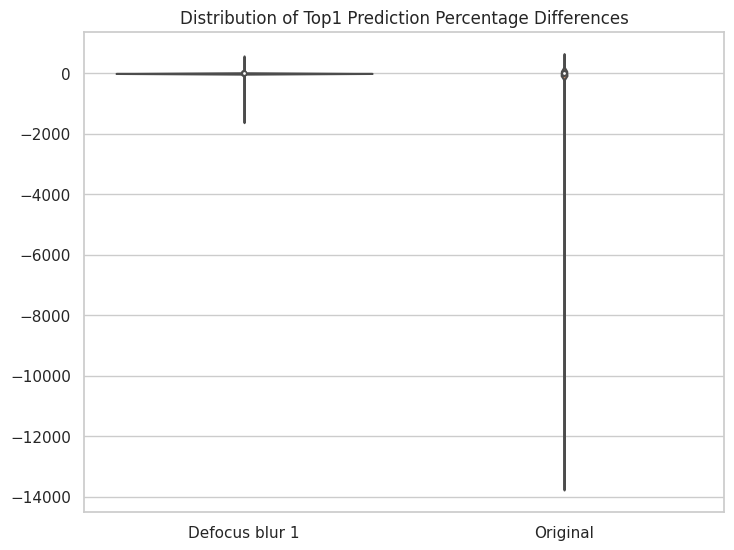

In [19]:
import torch
from torchvision import transforms
from transformers import ViTForImageClassification
from pathlib import Path
from skimage import io
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_subdirs(dataset_path):
    dataset_path = Path(dataset_path)
    subdirs = [subdir for subdir in dataset_path.iterdir() if subdir.is_dir()]
    subdir_names = [subdir.name for subdir in subdirs]
    return subdir_names, subdirs

def preprocess_image(img):
    img = Image.fromarray(img)  # Convert ndarray to PIL Image
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([
        transforms.Resize((384, 384)),  # Adjust size for ViT
        transforms.ToTensor(),
        normalize
    ])
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension
    return img_tensor

def load_model():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = ViTForImageClassification.from_pretrained('google/vit-large-patch32-384').to(device)
    model.eval()
    return model, device


def predict(model, device, img_tensor):
    img_tensor = img_tensor.to(device)  # Move image tensor to the same device as the model
    with torch.no_grad():
        logits = model(img_tensor).logits
        predicted_label = torch.argmax(logits, dim=1).item()
    return predicted_label

def predict_with_logits(model, device, img_tensor):
    img_tensor = img_tensor.to(device)
    with torch.no_grad():
        logits = model(img_tensor).logits
    return logits
# Load the model
model, device = load_model()


dataset1_path = '/home/workstation/code/XAImethods/CAIN/evaluation_results/imagenet/val_images10k_attack/defocus_blur/1_vit/google/vit-large-patch32-384/GradCAM'
dataset2_path = '/home/workstation/code/XAImethods/CAIN/evaluation_results/imagenet/val_images10k_vit/google/vit-large-patch32-384/GradCAM'

subdir_names1, subdirs1 = load_subdirs(dataset1_path)
subdir_names2, subdirs2 = load_subdirs(dataset2_path)

common_subdir_names = set(subdir_names1).intersection(subdir_names2)
common_subdirs1 = [subdirs1[subdir_names1.index(subdir_name)] for subdir_name in common_subdir_names]
common_subdirs2 = [subdirs2[subdir_names2.index(subdir_name)] for subdir_name in common_subdir_names]

differences_1 = []
differences_2 = []
percentage_differences_1 = []
percentage_differences_2 = []

pred_orig1 = predict(model, device, preprocess_image(original_img1))
pred_orig2 = predict(model, device, preprocess_image(original_img2))
pred_masked1 = predict(model, device, preprocess_image(masked_img1))
pred_masked2 = predict(model, device, preprocess_image(masked_img2))


for subdir1, subdir2 in tqdm(zip(common_subdirs1, common_subdirs2), total=len(common_subdirs1), desc="Processing images"):
    original_img1 = io.imread(subdir1 / "original.jpg")
    original_img2 = io.imread(subdir2 / "original.jpg")
    masked_img1 = io.imread(subdir1 / "masked_image.jpg")
    masked_img2 = io.imread(subdir2 / "masked_image.jpg")
    
    logits_orig1 = predict_with_logits(model, device, preprocess_image(original_img1))
    logits_orig2 = predict_with_logits(model, device, preprocess_image(original_img2))
    logits_masked1 = predict_with_logits(model, device, preprocess_image(masked_img1))
    logits_masked2 = predict_with_logits(model, device, preprocess_image(masked_img2))
    
    # 提取正确类别的预测分数
    score_orig1 = logits_orig1[0, pred_orig1].item()
    score_orig2 = logits_orig2[0, pred_orig2].item()
    score_masked1 = logits_masked1[0, pred_masked1].item()
    score_masked2 = logits_masked2[0, pred_masked2].item()
    
    difference_1 = abs(score_orig1 - score_masked1)
    difference_2 = abs(score_orig2 - score_masked2)
    
    differences_1.append(difference_1)
    differences_2.append(difference_2)
    
    # 计算百分比的差异
    percentage_difference_1 = difference_1 / score_orig1 if score_orig1 != 0 else 0
    percentage_difference_2 = difference_2 / score_orig2 if score_orig2 != 0 else 0
    
    percentage_differences_1.append(percentage_difference_1)
    percentage_differences_2.append(percentage_difference_2)



# 计算平均预测差异的百分比
average_percentage_difference_1 = sum(percentage_differences_1) / len(percentage_differences_1)
average_percentage_difference_2 = sum(percentage_differences_2) / len(percentage_differences_2)

# 计算百分比差异的中位数
median_percentage_difference_1 = np.median(percentage_differences_1)
median_percentage_difference_2 = np.median(percentage_differences_2)

print(f"Median Top1 prediction percentage difference for Defocus blur 1: {median_percentage_difference_1:.2%}")
print(f"Median Top1 prediction percentage difference for Original: {median_percentage_difference_2:.2%}")

# 2. Plot Violin Plots using percentage differences
data_to_plot = [percentage_differences_1, percentage_differences_2]

# Setting the style of the visualization
sns.set(style="whitegrid")

# Creating a figure instance
fig = plt.figure()

# Creating an axes instance
ax = fig.add_axes([0,0,1,1])

# Creating violinplot
bp = sns.violinplot(data=data_to_plot)
ax.set_xticklabels(['Defocus blur 1', 'Original'])

# Adding the title to the plot
plt.title('Distribution of Top1 Prediction Percentage Differences')
 
# Finally showing the plot
plt.show()



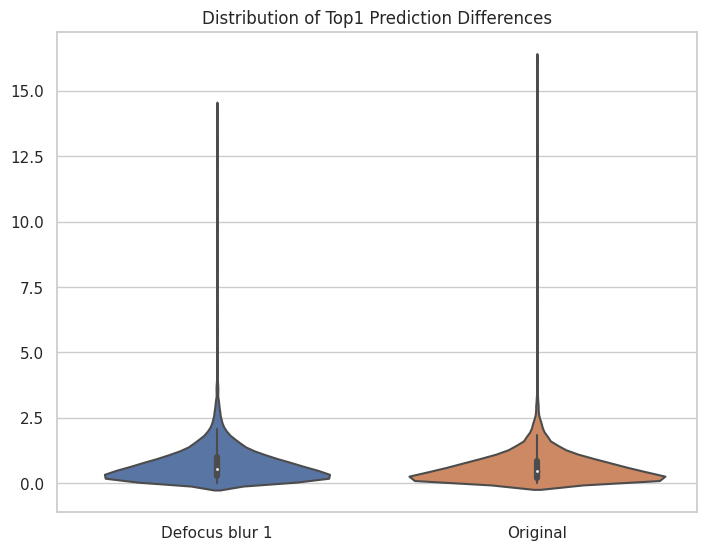

In [15]:
# 2. Plot Violin Plots
data_to_plot = [differences_1, differences_2]

# Setting the style of the visualization
sns.set(style="whitegrid")

# Creating a figure instance
fig = plt.figure()

# Creating an axes instance
ax = fig.add_axes([0,0,1,1])

# Creating violinplot
bp = sns.violinplot(data=data_to_plot)
ax.set_xticklabels(['Defocus blur 1', 'Original'])

# Adding the title to the plot
plt.title('Distribution of Top1 Prediction Differences')
 
# Finally showing the plot
plt.show()

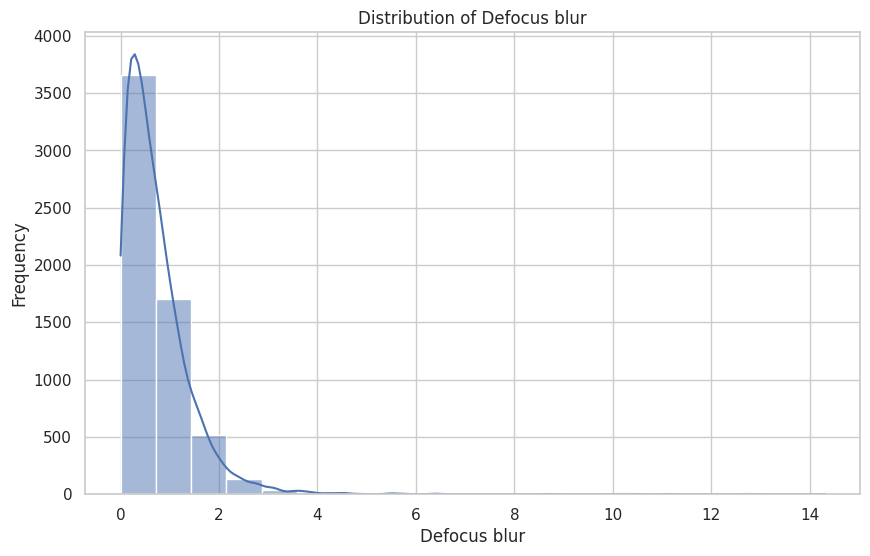

=== Statistical Summary for Defocus blur ===
Mean: 0.73
Standard Deviation: 0.72
Median: 0.56
1st Quartile: 0.27
3rd Quartile: 1.00




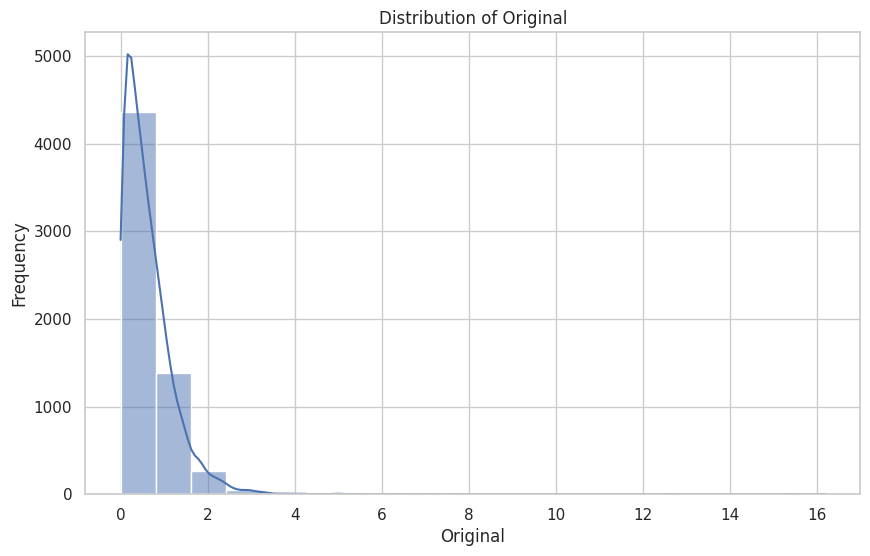

=== Statistical Summary for Original ===
Mean: 0.63
Standard Deviation: 0.65
Median: 0.48
1st Quartile: 0.21
3rd Quartile: 0.87




In [20]:
# Create a dictionary of metrics (here, the prediction differences for the two groups)
all_metrics = {
    'Defocus blur': differences_1,
    'Original': differences_2
}

for metric, values in all_metrics.items():
    plt.figure(figsize=(10, 6))
    
    # Use Seaborn to plot a histogram with KDE (Kernel Density Estimation)
    sns.histplot(values, bins=20, kde=True)
    
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.show()
    
    # Statistical analysis
    mean_value = np.mean(values)
    std_dev = np.std(values)
    median_value = np.median(values)
    quartiles = np.percentile(values, [25, 75])
    
    print(f"=== Statistical Summary for {metric} ===")
    print(f"Mean: {mean_value:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"1st Quartile: {quartiles[0]:.2f}")
    print(f"3rd Quartile: {quartiles[1]:.2f}")
    print("\n")


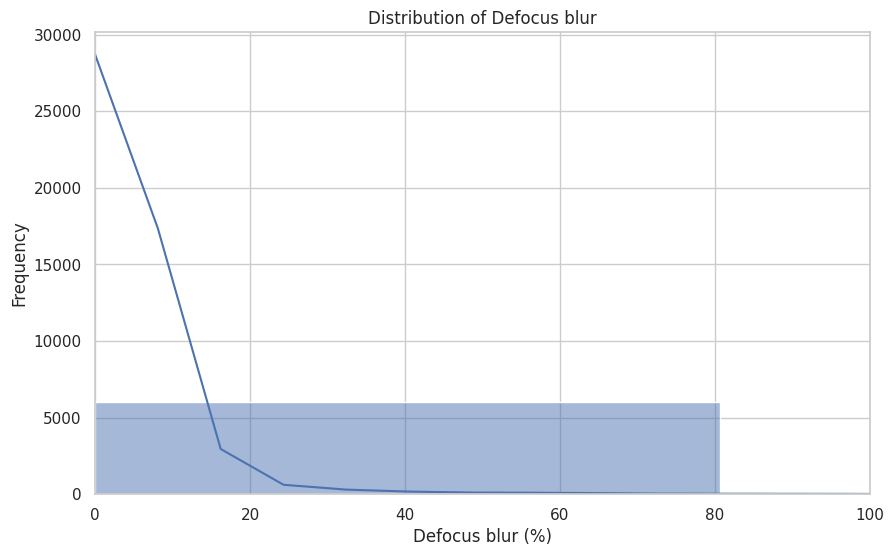

=== Statistical Summary for Defocus blur ===
Mean: 4.66%
Standard Deviation: 34.82%
Median: 1.00%
1st Quartile: 0.46%
3rd Quartile: 2.21%




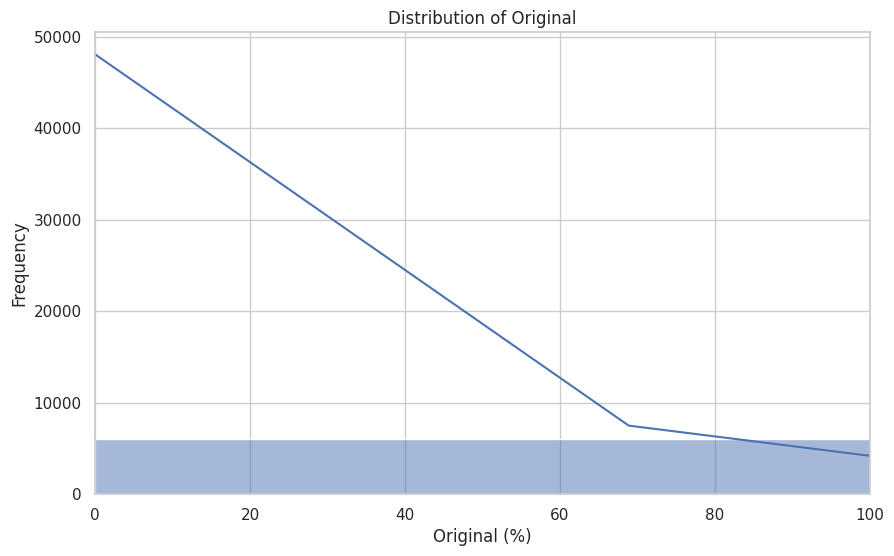

=== Statistical Summary for Original ===
Mean: 7.83%
Standard Deviation: 193.51%
Median: 0.99%
1st Quartile: 0.42%
3rd Quartile: 2.28%




In [24]:
# Create a dictionary of metrics (here, the prediction percentage differences for the two groups)
all_metrics = {
    'Defocus blur': percentage_differences_1,
    'Original': percentage_differences_2
}

for metric, values in all_metrics.items():
    values = np.abs(values)  # Convert values to their absolute values
    
    plt.figure(figsize=(10, 6))
    
    # Use Seaborn to plot a histogram with KDE (Kernel Density Estimation)
    sns.histplot(values, bins=20, kde=True)
    
    plt.title(f'Distribution of {metric}')
    plt.xlabel(f'{metric} (%)')  # Add percentage symbol to the xlabel
    plt.ylabel('Frequency')
    plt.xlim(0, 100)  # Set x-axis limits from 0 to 100
    
    # Show the plot
    plt.show()
    
    # Statistical analysis
    mean_value = np.mean(values)
    std_dev = np.std(values)
    median_value = np.median(values)
    quartiles = np.percentile(values, [25, 75])
    
    print(f"=== Statistical Summary for {metric} ===")
    print(f"Mean: {mean_value:.2f}%")
    print(f"Standard Deviation: {std_dev:.2f}%")
    print(f"Median: {median_value:.2f}%")
    print(f"1st Quartile: {quartiles[0]:.2f}%")
    print(f"3rd Quartile: {quartiles[1]:.2f}%")
    print("\n")
